In [ ]:
if 'google.colab' in str(get_ipython()):
    print('Running on CoLab. Installing package from pypi')
    !pip install pymagnet -q
    print("Getting stl files")
    !mkdir stl
    !wget https://raw.githubusercontent.com/pdunne/pymagnet/main/examples/STL%20Magnets/stl/HalfDonut.stl -O stl/HalfDonut.stl -q
    !wget https://github.com/pdunne/pymagnet/raw/main/examples/STL%20Magnets/stl/hollow_hex.STL -O stl/hollow_hex.stl -q
    !wget https://github.com/pdunne/pymagnet/raw/main/examples/STL%20Magnets/stl/star.STL -O stl/star.stl -q
    !wget https://github.com/pdunne/pymagnet/raw/main/examples/STL%20Magnets/stl/cube.STL -O stl/cube.stl -q
    !wget https://github.com/pdunne/pymagnet/raw/main/examples/STL%20Magnets/stl/pentagon_prism.STL -O stl/pentagon_prism.stl -q
    print("Done.")
else:
    print('Not running on CoLab.')

In [38]:
import numpy as np
import pymagnet as pm
%matplotlib inline
# %matplotlib notebook

%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
PI = np.pi
MU0= 4e-7*PI

Setup Helper functions

In [79]:
def plot_force_result(offsets,f_total, spacing=None, compare=None, plot_type='force'):
    fig,ax = plt.subplots(figsize=(8,8))
    
    if plot_type.lower() == 'torque':
        labels = [ r"$\tau_x$", r"$\tau_y$", r"$\tau_z$"]
    else:
        labels = [ r"$F_x$", r"$F_y$", r"$F_z$"]
    
    plt.plot(offsets,f_total[:,0], label=labels[0])
    plt.plot(offsets,f_total[:,1], label=labels[1])
    plt.plot(offsets,f_total[:,2], label=labels[2])
    
    if spacing is not None and compare is not None:
        plt.scatter(spacing,compare[0])
        plt.scatter(spacing,compare[1])
        plt.scatter(spacing,compare[2])

    plt.legend(loc='best')
    if plot_type.lower() == 'torque':
        plt.ylabel(r'$\tau$ (µN.m)')
    else:
        plt.ylabel(r'$F$ (mN)')
    plt.xlabel(r"$d$ (mm)")
    plt.grid(True)
    plt.show()

In [80]:


def gen_mesh_mag(path, file, offset=0):
    pm.reset_magnets()
    
    Jr=1.0,
    theta=90
    phi=90

    center = (0, 0, 0)
    m0 = pm.magnets.Mesh(
        path + file,
        Jr=1.0,
        center=center,
        theta=theta,
        phi=phi + 30,
        alpha=0,
        beta=0,
        gamma=30,
    )
    
    m1 = None
    center = (0.5, m0.mesh_vectors[:,:,1].max() + 0.5 + offset, -0.5)
    m1 = pm.magnets.Mesh(
        path + file,
        Jr=1.0,
        center=center,
        theta=theta,
        phi=phi,
        alpha=0,
        beta=30,
        gamma=0,
    )

    return m0, m1


3D Render
![Slice Plot](img/pentagon_angle.png)

In [ ]:
mask_magnet = False  # mask values inside a magnet - doesn't work for Mesh magnets
show_magnets = True  # draw magnet in plots


path ='stl/'
file = "pentagon_prism.stl"
m0, m1 = gen_mesh_mag(
    path =path,
    file = file,
    offset= 0
)


# print(m1)
# print(m1.centroid)
fig = pm.plots.plot_magnet()


In [77]:
path ='./'
file = "pentagon_prism.stl"

force_points = 51
f_total = np.zeros((force_points,3))
t_total = np.zeros((force_points,3))
offsets = np.linspace(1e-4,5,force_points)


for i in range(force_points):
        m0, m1 = gen_mesh_mag(path, file, offset = offsets[i])
        f_total[i], t_total[i] = m0.get_force_torque(depth=4, unit='mm')

exception (0, 'Unexpected EOF')
exception (0, 'Unexpected EOF')
exception (0, 'Unexpected EOF')
exception (0, 'Unexpected EOF')
exception (0, 'Unexpected EOF')
exception (0, 'Unexpected EOF')
exception (0, 'Unexpected EOF')
exception (0, 'Unexpected EOF')
exception (0, 'Unexpected EOF')
exception (0, 'Unexpected EOF')
exception (0, 'Unexpected EOF')
exception (0, 'Unexpected EOF')
exception (0, 'Unexpected EOF')
exception (0, 'Unexpected EOF')
exception (0, 'Unexpected EOF')
exception (0, 'Unexpected EOF')
exception (0, 'Unexpected EOF')
exception (0, 'Unexpected EOF')
exception (0, 'Unexpected EOF')
exception (0, 'Unexpected EOF')
exception (0, 'Unexpected EOF')
exception (0, 'Unexpected EOF')
exception (0, 'Unexpected EOF')
exception (0, 'Unexpected EOF')
exception (0, 'Unexpected EOF')
exception (0, 'Unexpected EOF')
exception (0, 'Unexpected EOF')
exception (0, 'Unexpected EOF')
exception (0, 'Unexpected EOF')
exception (0, 'Unexpected EOF')
exception (0, 'Unexpected EOF')
exceptio

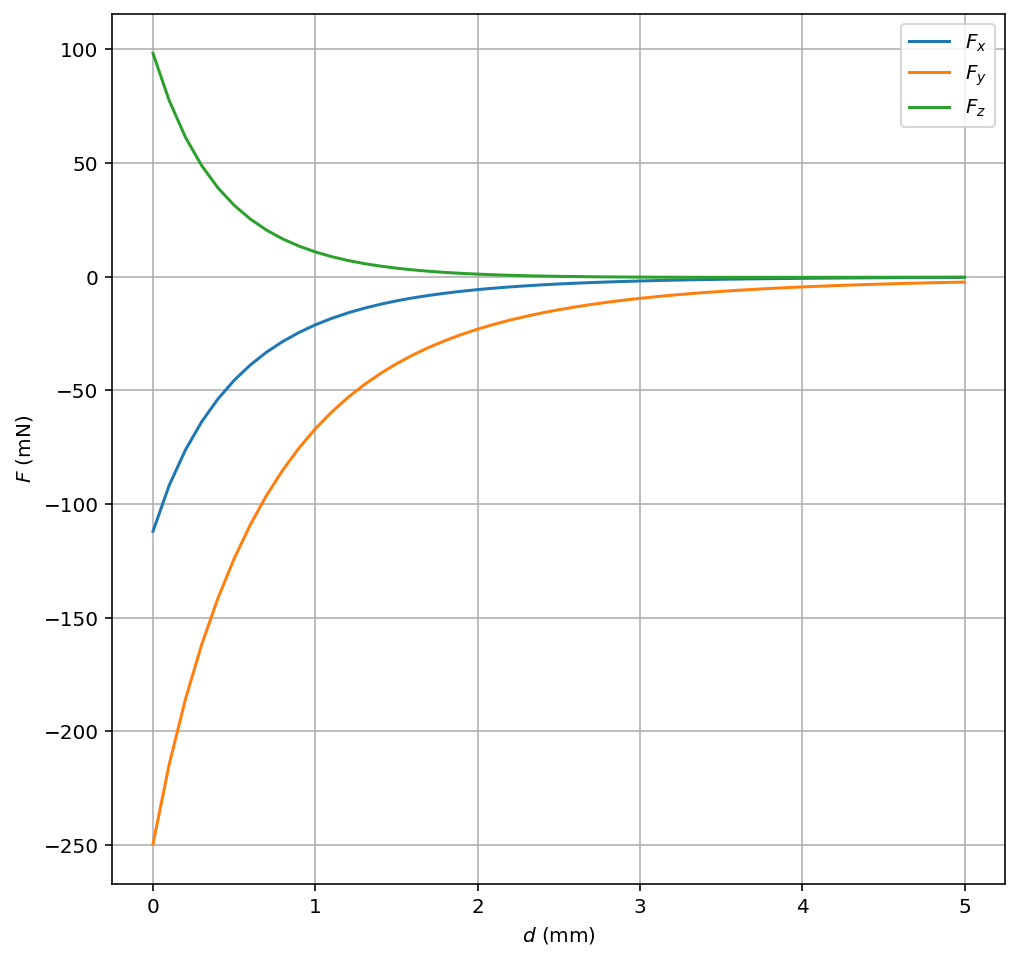

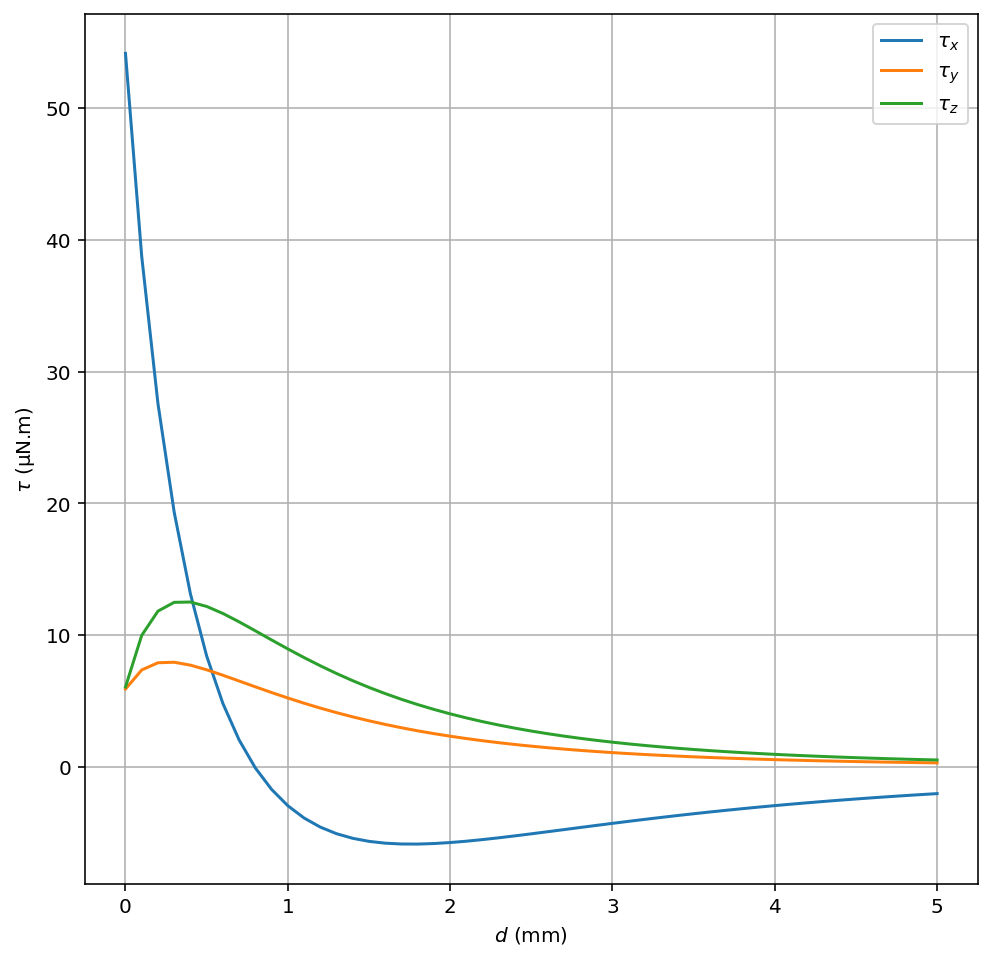

In [83]:
plot_force_result(offsets,f_total*1e3, None, None, plot_type='force')
plot_force_result(offsets,t_total*1e6, None, None, plot_type='torque')

3D Render
![Slice Plot](img/pentagon_angle.png)

In [ ]:
m0, m1 = gen_mesh_mag(path, file, offset = 0.5)
fig_slice, slice_cache, data_objects = pm.plots.slice_quickplot(cmax=0.5,
                                              num_levels=11,
                                              opacity=0.9,
                                              num_arrows=10,
                                              num_points=100,
                                              cone_opacity=0.9,
                                              magnet_opacity=1.0,
                                              mask_magnet = mask_magnet,
                                              show_magnets=show_magnets,
                                              colorscale='viridis',
                                              max1 = 3,
                                              max2 = 3,
                                              slice_value= 0.0,
                                              unit = 'mm'
                               )



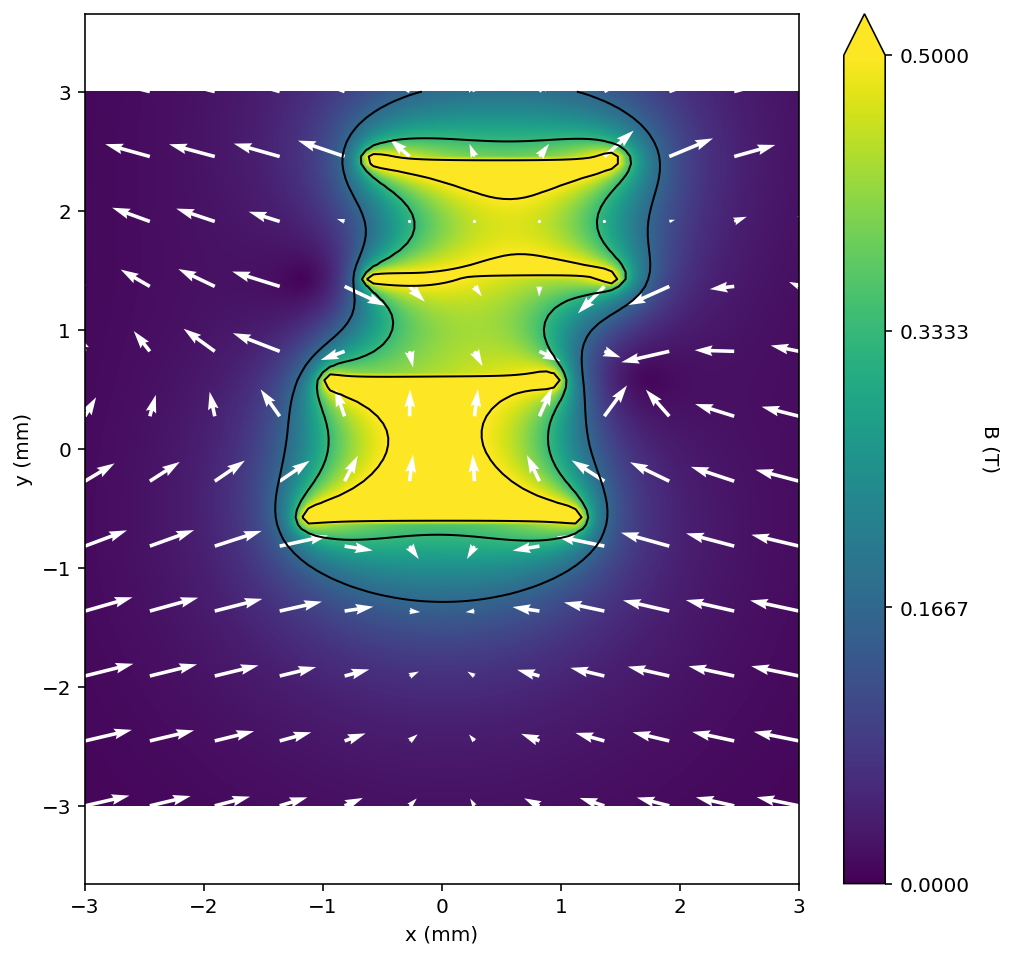

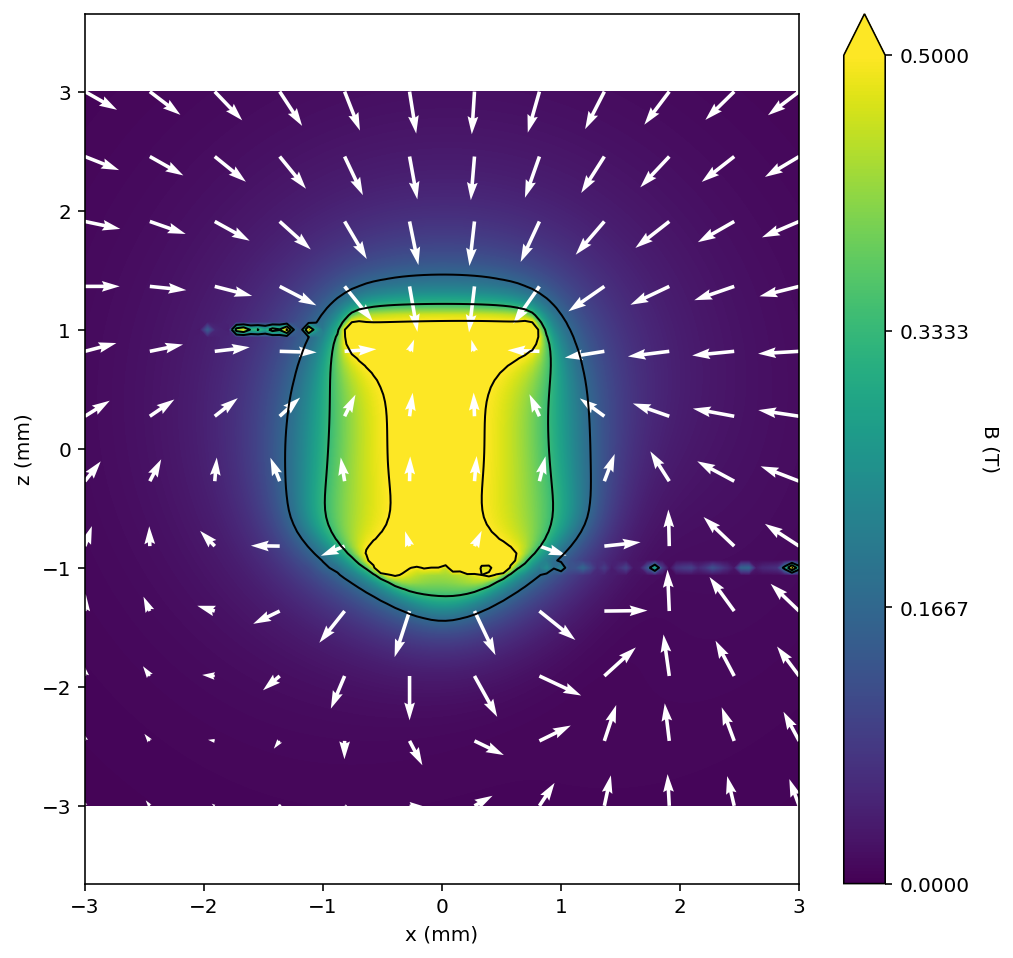

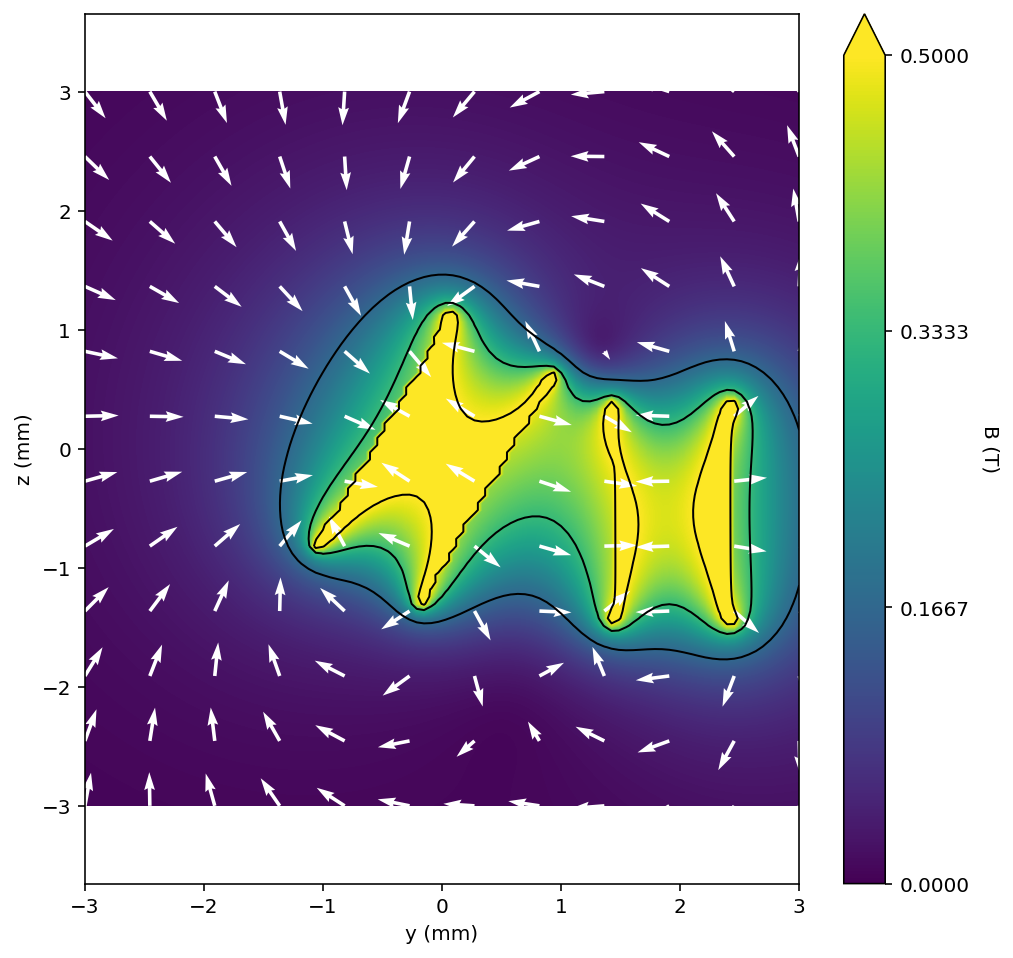

In [75]:
for plane in slice_cache.keys():
    pm.plots.plot_3D_contour(slice_cache[plane]['points'], slice_cache[plane]['field'], plane,
                             cmin = 0,
                             cmax=0.5,
                             num_levels=4,
                             cmap='viridis',
                             vector_plot=True,
                             vector_arrows = 11,
#                              vector_color = 'k'
                            )